In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [54]:

df = pd.read_csv("FWI Dataset.csv")
print(df)
print(df.info())
print(df.describe())
print(df.head())
print(df.tail())

     day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI  \
0      1      6  2012           29   57   18    0.0  65.7   3.4   7.6  1.3   
1      2      6  2012           29   61   13    1.3  64.4   4.1   7.6  1.0   
2      3      6  2012           26   82   22   13.1  47.1   2.5   7.1  0.3   
3      4      6  2012           25   89   13    2.5  28.6   1.3   6.9  0.0   
4      5      6  2012           27   77   16    0.0  64.8   3.0  14.2  1.2   
..   ...    ...   ...          ...  ...  ...    ...   ...   ...   ...  ...   
239   26      9  2012           30   65   14    0.0  85.4  16.0  44.5  4.5   
240   27      9  2012           28   87   15    4.4  41.1   6.5     8  0.1   
241   28      9  2012           27   87   29    0.5  45.9   3.5   7.9  0.4   
242   29      9  2012           24   54   18    0.1  79.7   4.3  15.2  1.7   
243   30      9  2012           24   64   15    0.2  67.3   3.8  16.5  1.2   

      BUI  FWI     Classes            Region  
0     3.4  0.5  

In [55]:
if 'Region' in df.columns:
    print("Encoding Region column...")
    df['Region'] = df['Region'].astype('category').cat.codes

Encoding Region column...


In [56]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [57]:
print("Dataset shape:", df.shape)
print("Original columns:", df.columns)


Dataset shape: (244, 15)
Original columns: Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')


In [58]:
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64


In [59]:
print("Rows containing missing values:")
print(df[df.isnull().any(axis=1)])

Rows containing missing values:
     day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC      DC   ISI  \
165   14      7  2012           37   37   18    0.2  88.9  12.9  14.6 9  12.5   

      BUI      FWI Classes    Region  
165  10.4  fire          NaN       1  


In [60]:
df.columns = df.columns.str.strip()
print("Column names after stripping spaces:")
print(df.columns)

Column names after stripping spaces:
Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [61]:
print("Cleaning string columns")
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.strip()


Cleaning string columns


In [62]:
print("Fixing corrupted numeric entries")
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace("  ", " ")
    if df[col].dtype == 'object' and df[col].str.contains(" ").any():
        df[col] = df[col].str.split(" ").str[0]

Fixing corrupted numeric entries


In [63]:
numeric_cols = ['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [64]:
print("Filling missing values with mode")
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])
df['Classes'] = df['Classes'].fillna(df['Classes'].mode()[0])


Filling missing values with mode


In [65]:
print("Encoding categorical columns")
le_region = LabelEncoder()
df['Region_encoded'] = le_region.fit_transform(df['Region'])

Encoding categorical columns


In [66]:
le_class = LabelEncoder()
df['Classes_encoded'] = le_class.fit_transform(df['Classes'])

In [67]:
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
day                0
month              0
year               0
Temperature        0
RH                 0
Ws                 0
Rain               0
FFMC               0
DMC                0
DC                 0
ISI                0
BUI                0
FWI                1
Classes            0
Region             0
Region_encoded     0
Classes_encoded    0
dtype: int64


In [68]:
print("Final dataset shape:")
print(df.shape)

Final dataset shape:
(244, 17)


Label encoding non-numeric columns
Selecting all numeric columns (including encoded)
Plotting correlation heatmap for all numeric features


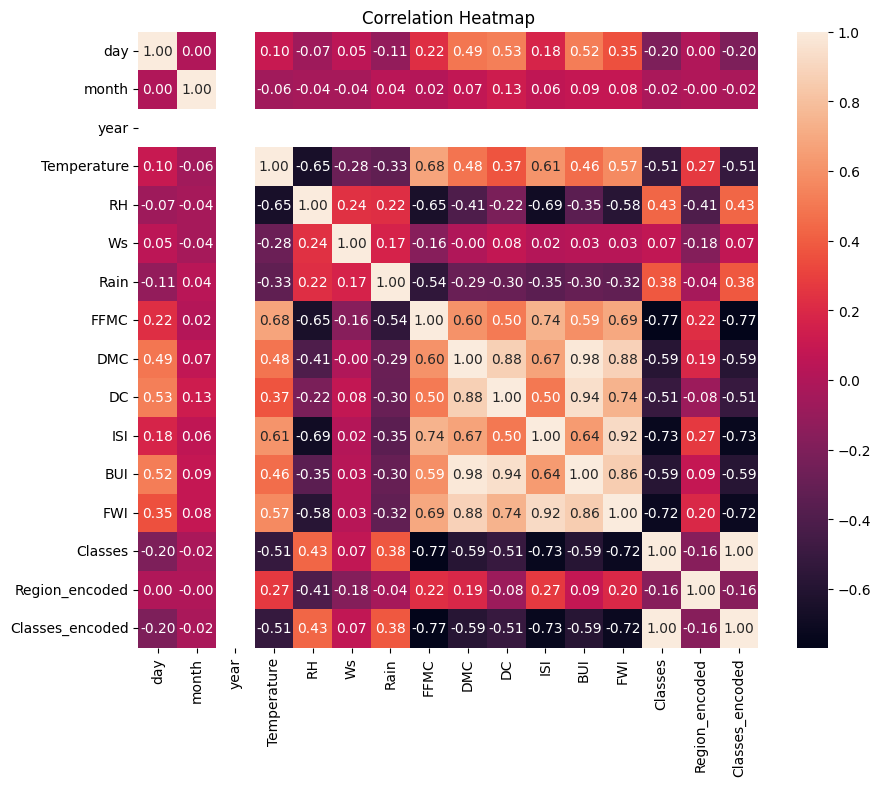

In [69]:
print("Label encoding non-numeric columns")
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le

print("Selecting all numeric columns (including encoded)")
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

print("Plotting correlation heatmap for all numeric features")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Plotting histograms for all numeric columns


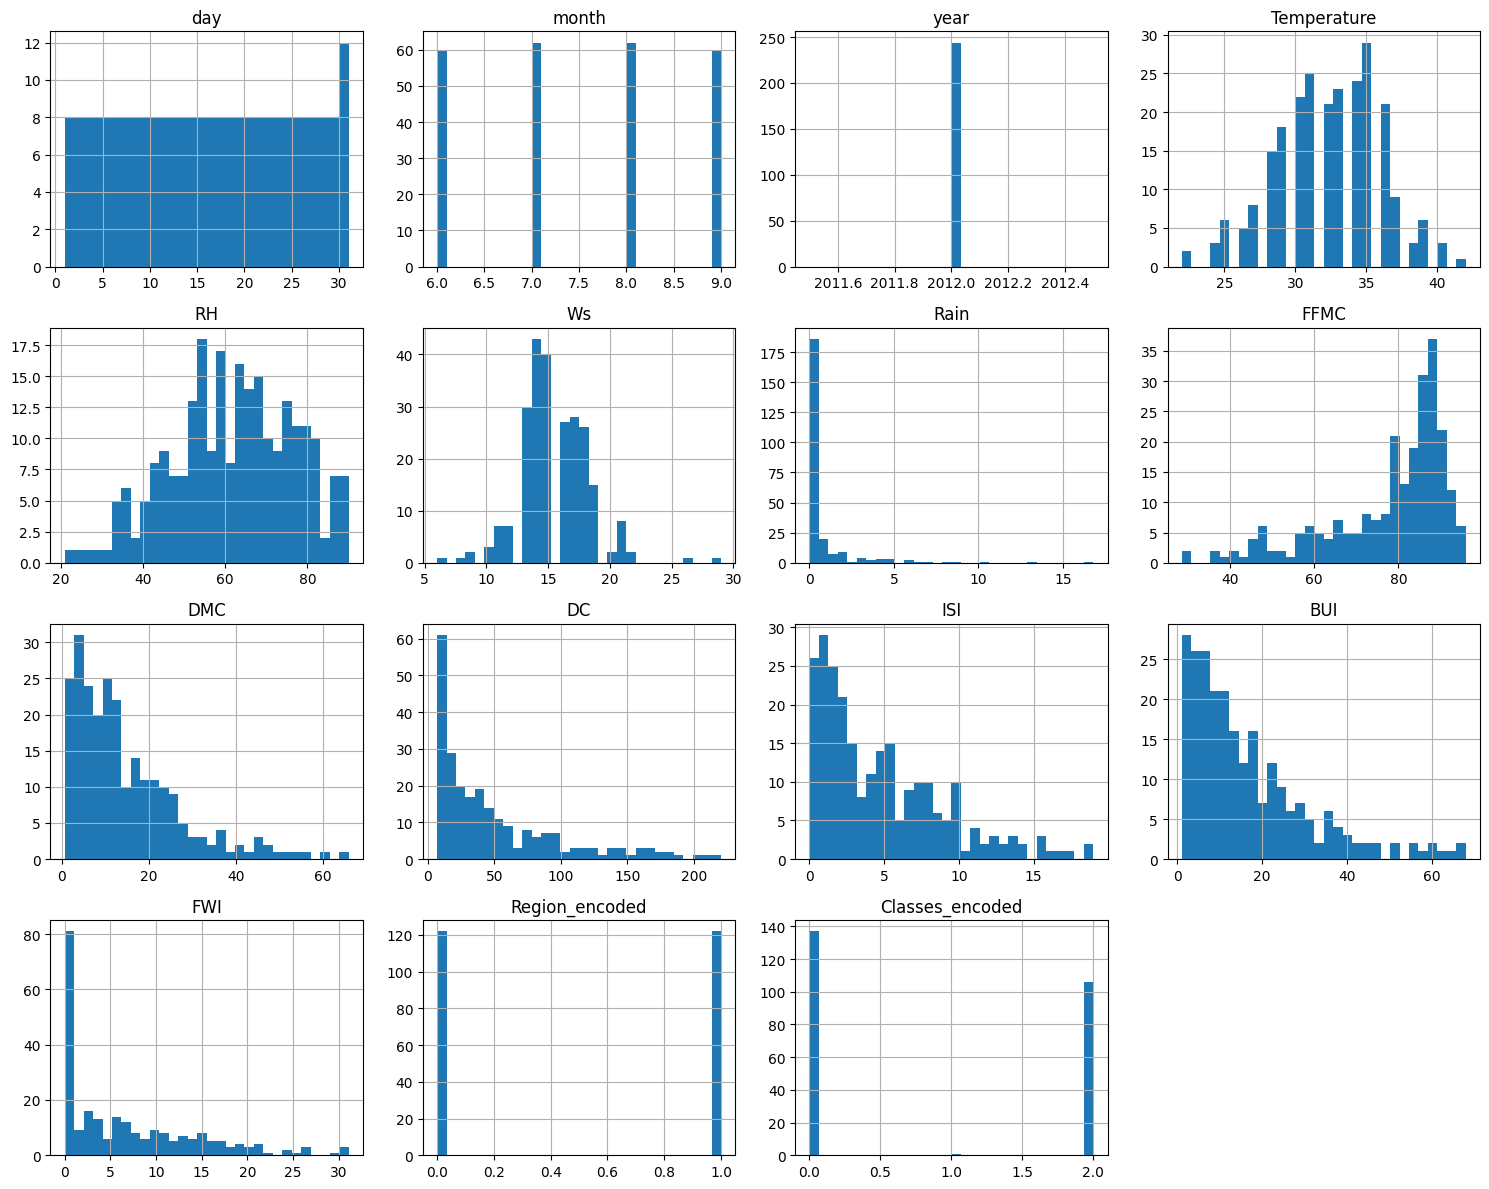

In [70]:
print("Plotting histograms for all numeric columns")
numeric_df = df.select_dtypes(include=['int64', 'float64'])

numeric_df.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()


Plotting correlation heatmap


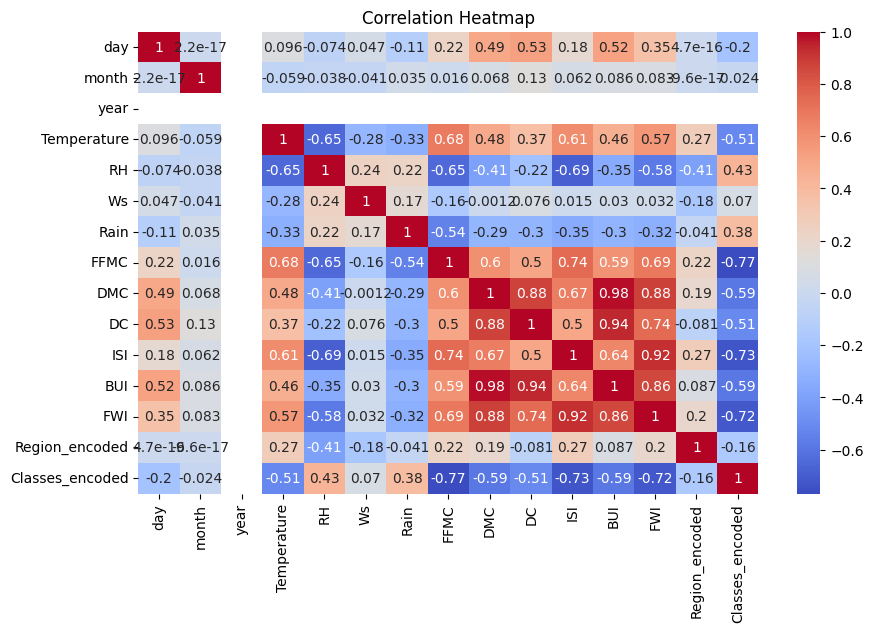

In [71]:
print("Plotting correlation heatmap")
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Plotting density distribution plots


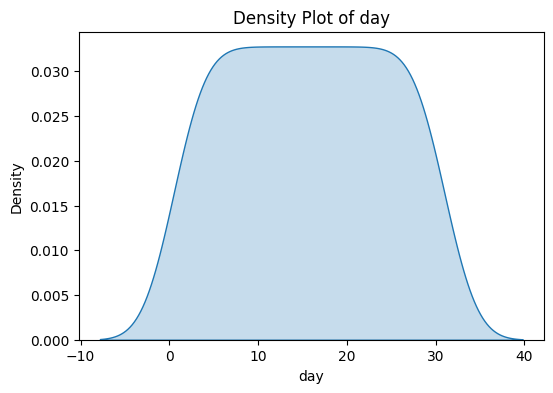

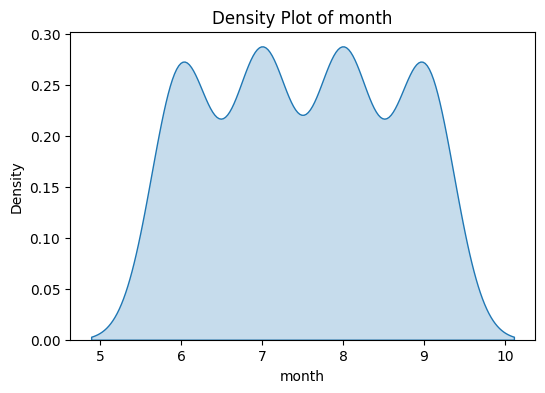

C:\Users\chandran\AppData\Local\Temp\ipykernel_30288\51613510.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(numeric_df[col], fill=True)


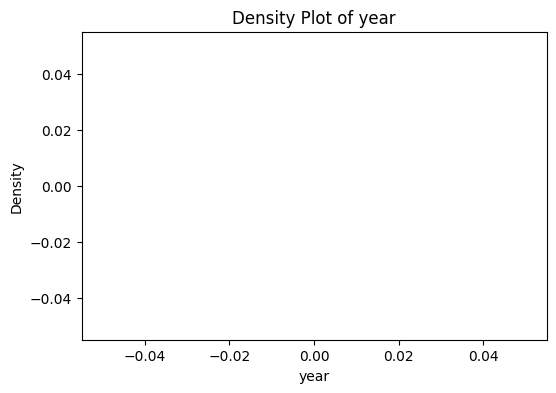

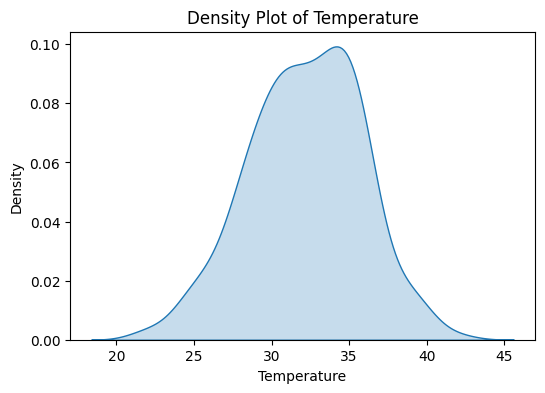

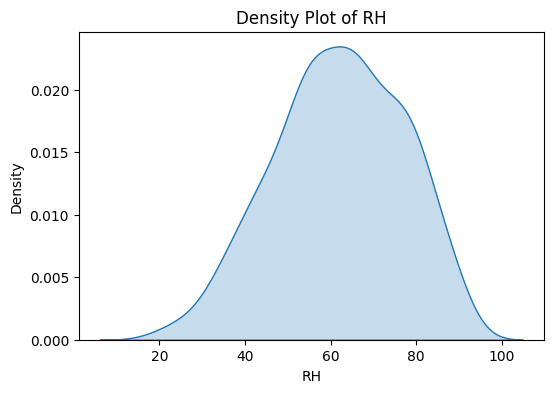

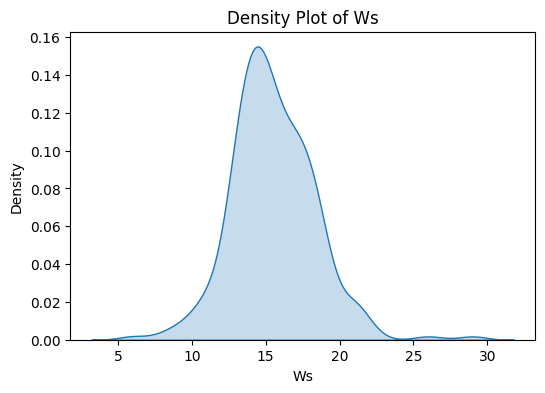

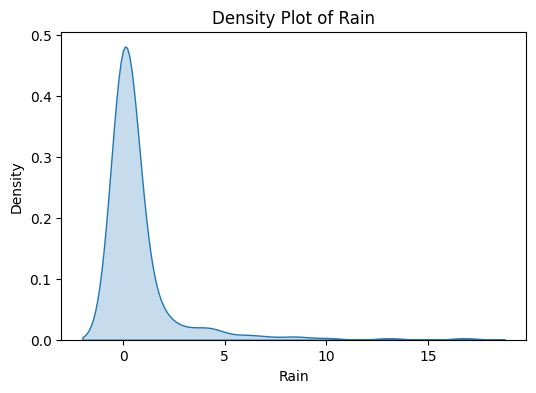

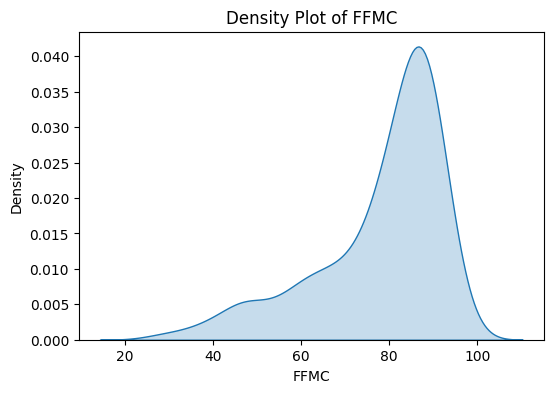

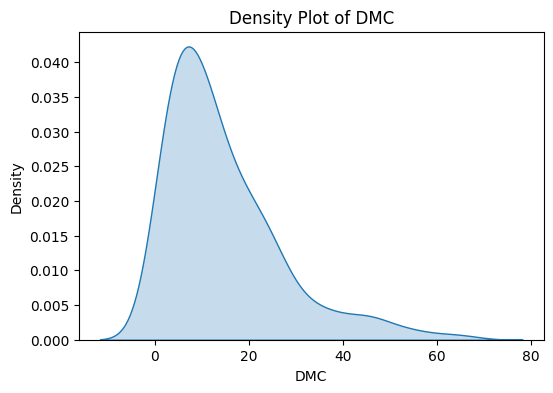

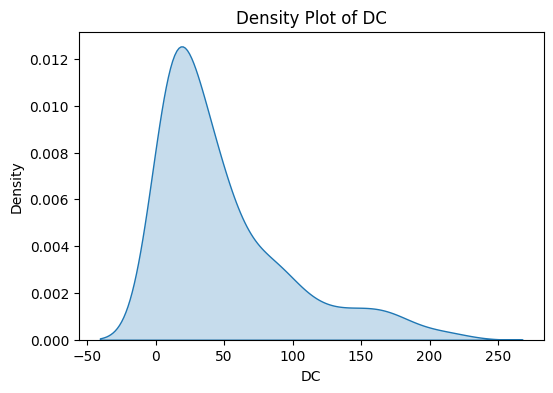

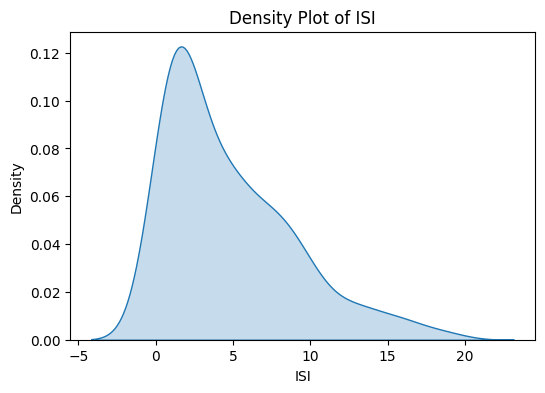

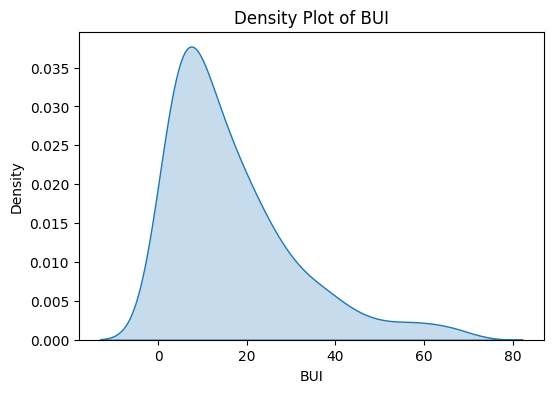

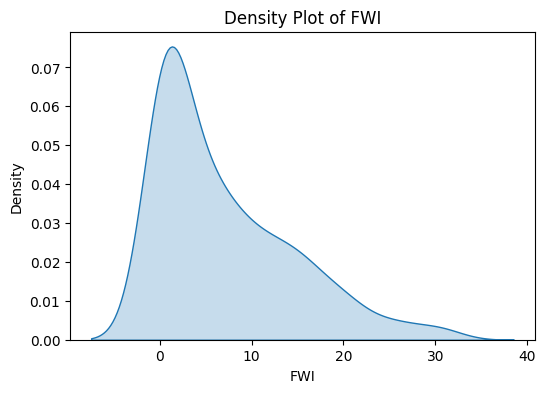

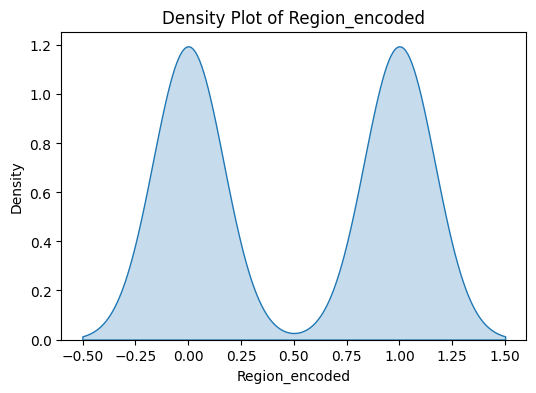

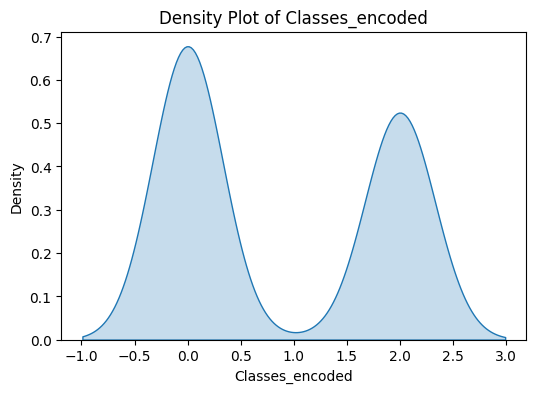

In [72]:
print("Plotting density distribution plots")
for col in numeric_df.columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(numeric_df[col], fill=True)
    plt.title(f"Density Plot of {col}")
    plt.show()


Plotting boxplots for outlier detection


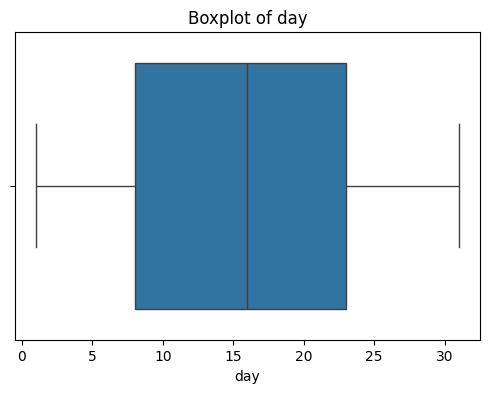

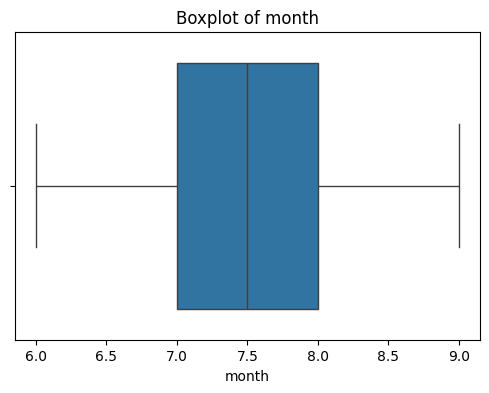

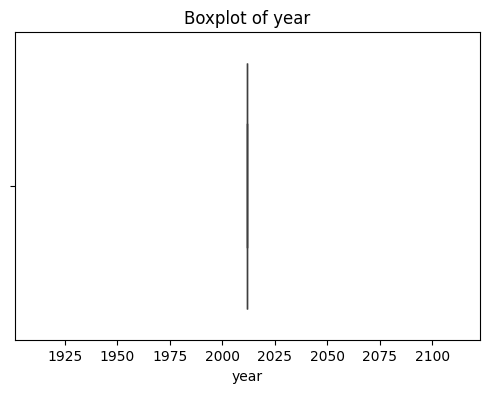

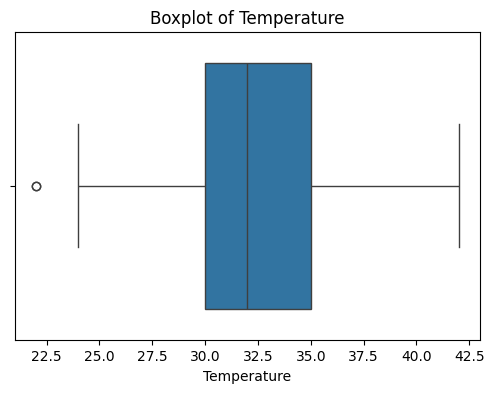

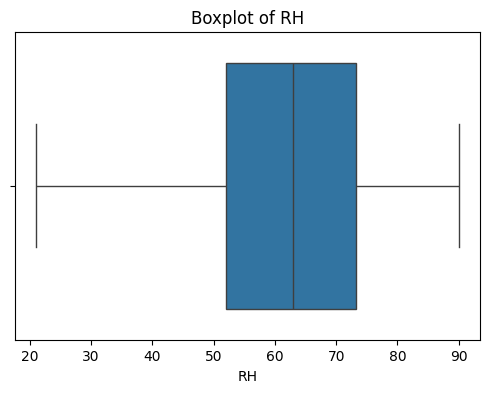

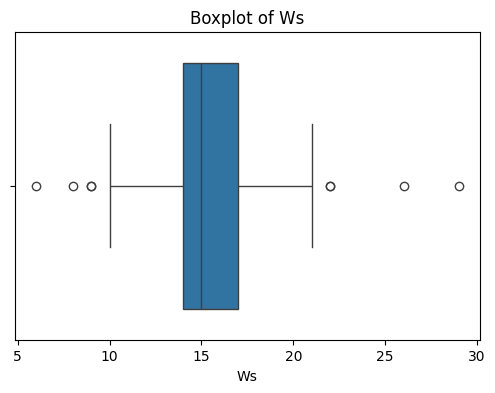

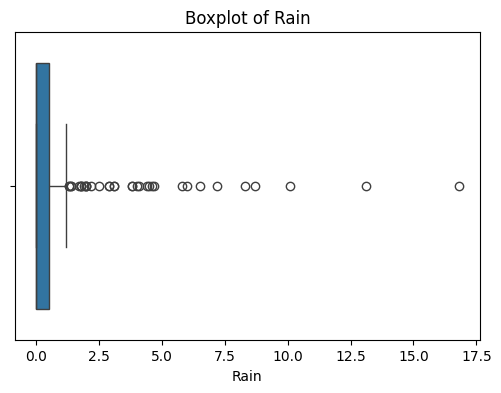

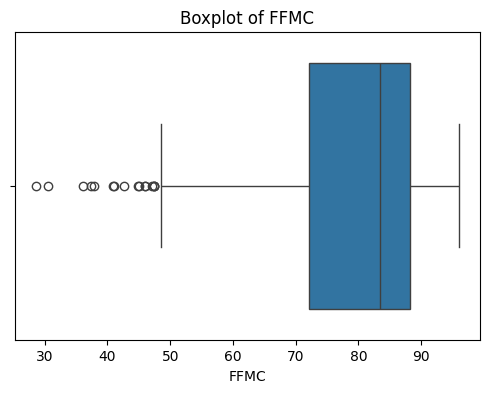

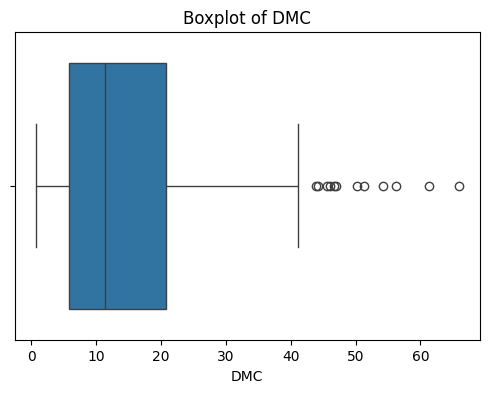

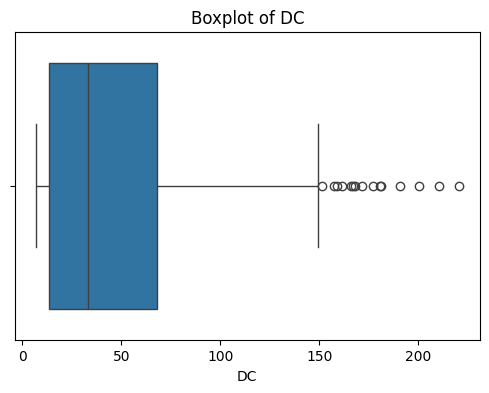

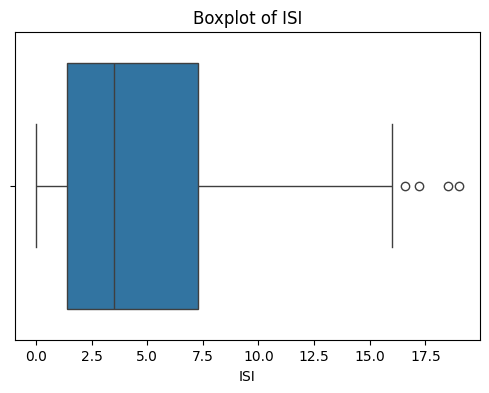

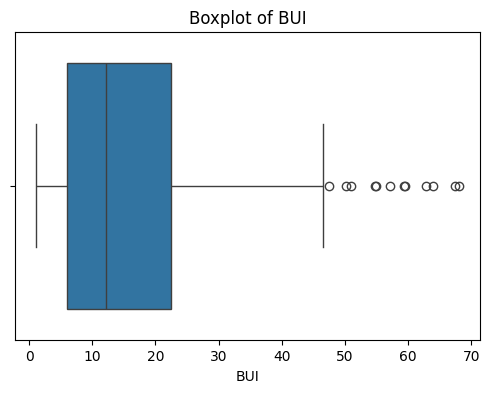

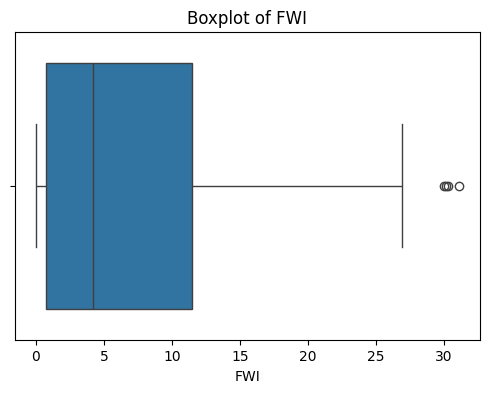

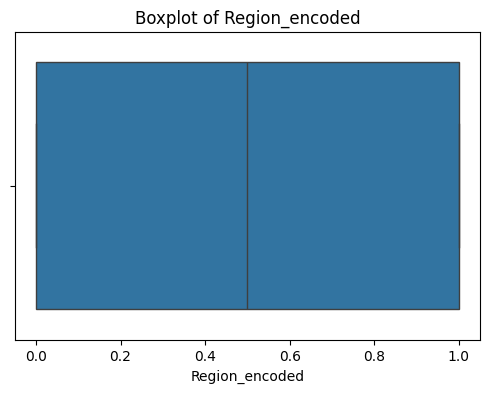

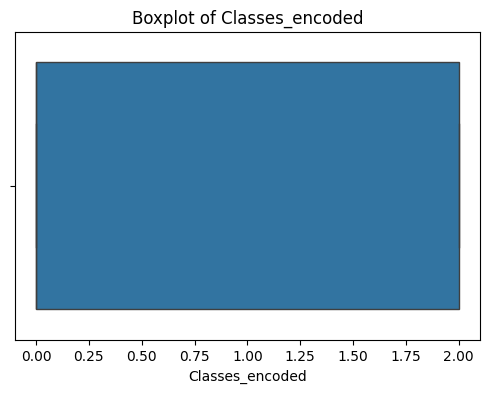

In [73]:
print("Plotting boxplots for outlier detection")
for col in numeric_df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [74]:
print("Performing outlier treatment using IQR method")

for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

print("Outlier treatment completed.")


Performing outlier treatment using IQR method
Outlier treatment completed.


In [75]:
print("Checking feature consistency")
print(df.isnull().sum())
print(df.dtypes)

Checking feature consistency
day                0
month              0
year               0
Temperature        0
RH                 0
Ws                 0
Rain               0
FFMC               0
DMC                0
DC                 0
ISI                0
BUI                0
FWI                1
Classes            0
Region             0
Region_encoded     0
Classes_encoded    0
dtype: int64
day                  int64
month                int64
year                 int64
Temperature        float64
RH                   int64
Ws                 float64
Rain               float64
FFMC               float64
DMC                float64
DC                 float64
ISI                float64
BUI                float64
FWI                float64
Classes             object
Region                int8
Region_encoded       int64
Classes_encoded      int64
dtype: object


Plotting scatterplots for feature relationships


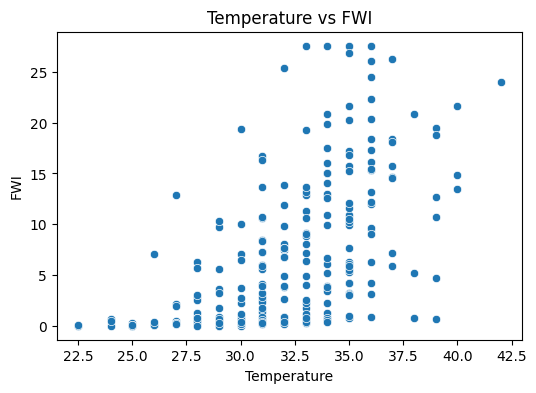

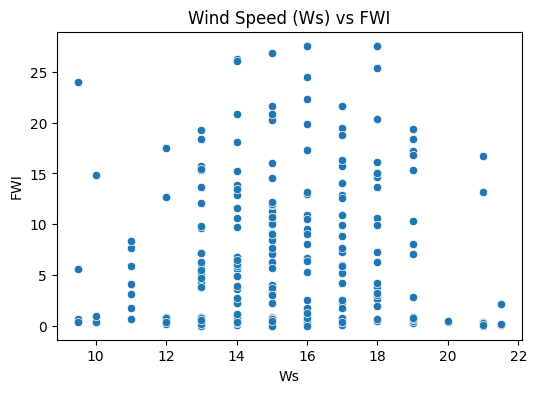

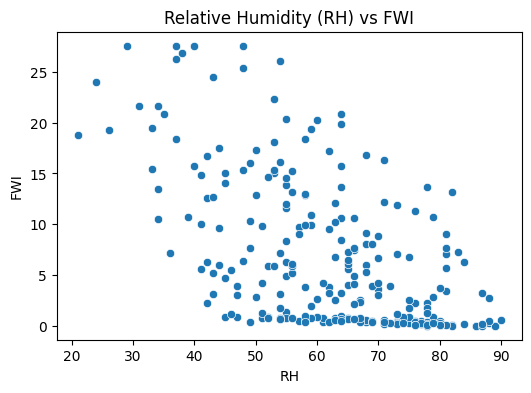

In [76]:
print("Plotting scatterplots for feature relationships")

plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Temperature'], y=df['FWI'])
plt.title("Temperature vs FWI")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Ws'], y=df['FWI'])
plt.title("Wind Speed (Ws) vs FWI")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['RH'], y=df['FWI'])
plt.title("Relative Humidity (RH) vs FWI")
plt.show()


In [77]:
print("Head and shape of final cleaned dataset:")
print(df.head())
print(df.shape)

Head and shape of final cleaned dataset:
   day  month  year  Temperature  RH    Ws  Rain     FFMC  DMC    DC  ISI  \
0    1      6  2012         29.0  57  18.0  0.00  65.7000  3.4   7.6  1.3   
1    2      6  2012         29.0  61  13.0  1.25  64.4000  4.1   7.6  1.0   
2    3      6  2012         26.0  82  21.5  1.25  47.7375  2.5   7.1  0.3   
3    4      6  2012         25.0  89  13.0  1.25  47.7375  1.3   6.9  0.0   
4    5      6  2012         27.0  77  16.0  0.00  64.8000  3.0  14.2  1.2   

   BUI  FWI Classes  Region  Region_encoded  Classes_encoded  
0  3.4  0.5     not       0               0                2  
1  3.9  0.4     not       0               0                2  
2  2.7  0.1     not       0               0                2  
3  1.7  0.0     not       0               0                2  
4  3.9  0.5     not       0               0                2  
(244, 17)


In [78]:
df.to_csv("FWI Cleaned.csv", index=False)
print("Saved cleaned_fwi.csv")

Saved cleaned_fwi.csv
